<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compétences-du-Workshop" data-toc-modified-id="Compétences-du-Workshop-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compétences du Workshop</a></span></li><li><span><a href="#Objectifs" data-toc-modified-id="Objectifs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objectifs</a></span></li><li><span><a href="#Philosophie-et-recommandations" data-toc-modified-id="Philosophie-et-recommandations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Philosophie et recommandations</a></span></li><li><span><a href="#Prétraitement-et-préparation-de-l'environnement" data-toc-modified-id="Prétraitement-et-préparation-de-l'environnement-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prétraitement et préparation de l'environnement</a></span><ul class="toc-item"><li><span><a href="#Nettoyage-des-tweets" data-toc-modified-id="Nettoyage-des-tweets-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Nettoyage des tweets</a></span></li><li><span><a href="#Tokénisation-ou-segmentation" data-toc-modified-id="Tokénisation-ou-segmentation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Tokénisation ou segmentation</a></span></li><li><span><a href="#Word-Embedding:-convertir-un-document-en-une-matrice-de-nombres" data-toc-modified-id="Word-Embedding:-convertir-un-document-en-une-matrice-de-nombres-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Word Embedding: convertir un document en une matrice de nombres</a></span></li><li><span><a href="#Préparation-du-pipeline" data-toc-modified-id="Préparation-du-pipeline-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Préparation du pipeline</a></span></li></ul></li><li><span><a href="#Entraînement-du-modèle" data-toc-modified-id="Entraînement-du-modèle-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Entraînement du modèle</a></span><ul class="toc-item"><li><span><a href="#RNN:-Réseaux-de-neurones-réccurents-simples" data-toc-modified-id="RNN:-Réseaux-de-neurones-réccurents-simples-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>RNN: Réseaux de neurones réccurents simples</a></span></li><li><span><a href="#GRU:-Gated-Recurrent-Units" data-toc-modified-id="GRU:-Gated-Recurrent-Units-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>GRU: Gated Recurrent Units</a></span></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>LSTM</a></span></li></ul></li><li><span><a href="#Évaluation-des-performances-des-modèles" data-toc-modified-id="Évaluation-des-performances-des-modèles-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Évaluation des performances des modèles</a></span><ul class="toc-item"><li><span><a href="#Evaluation-des-modèles-par-le-dataset-test" data-toc-modified-id="Evaluation-des-modèles-par-le-dataset-test-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Evaluation des modèles par le dataset test</a></span></li><li><span><a href="#Évaluation-des-résultats-du-LSTM" data-toc-modified-id="Évaluation-des-résultats-du-LSTM-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Évaluation des résultats du LSTM</a></span></li><li><span><a href="#Pour-aller-plus-loin-avec-NLP" data-toc-modified-id="Pour-aller-plus-loin-avec-NLP-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Pour aller plus loin avec NLP</a></span></li></ul></li></ul></div>


# Traitement du langage naturel et classification par Réseaux de Neurones Récurrents (RNNs)

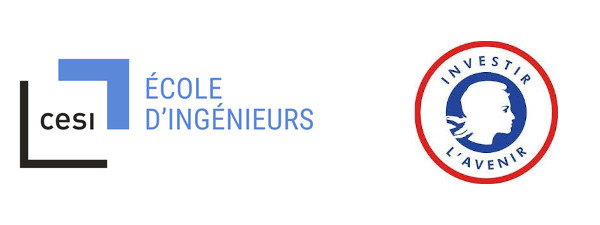
                    
<table>
<thead>
  <tr><th>Auteur</th><th>Relecteur</th><th>Centre</th><th>Modification</th>
</thead>
<tbody>
  <tr><td>Genane YOUNESS</td><td>Benjamin COHEN BOULAKIA</td><td>Nanterre</td><td>2023-02-07</td></tr>
</tbody>
</table>

L'objectif de de ce Workshop est de vous faire acquérir les notions de base du [traitement du langage naturel ou NLP (Natural Langage Processing)](https://lbourdois.github.io/blog/nlp/) et de construire un modèle de classification binaire avec les réseaux de neurones récurrents (RNNs).

Contrairement aux réseaux de neurones traditionnels, les réseaux de neurones récurrents s'étendent dans les séquences spatiales et temporelles. En d'autres termes, les couches cachées du moment présent et du moment suivant sont liées.
L'application que vous allez effectuer consiste à construire un modèle pour identifier les publications Twitter (« tweets ») qui annoncent une catastrophe. Cet apprentissage fait parti du traitement du langage naturel, NLP. 
Cette classification de texte binaire est importante, car elle pourrait aider les agences de l'État à identifier rapidement les catastrophes et à y répondre.
Les données disponibles sont les tweets étiquetés signalant une catastrophe ou non.
Au premier lieu, nous allons faire le nettoyage des données textuelles avant de passer à la classification binaire avec RNN. 

Le dataset utilisé dans ce Workshop est celui du challenge Kaggle [_Natural Language Processing with Disaster Tweets_](https://www.kaggle.com/competitions/nlp-getting-started/data). Ce dataset vous est fourni dans une archive <code>nlp-getting-started.zip</code>, décompressez son contenu dans un répertoire <code>nlp-getting-started</code> que vous placerez dans le même répertoire que ce Workshop.

##  Prétraitement et préparation de l'environnement

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

import matplotlib.pyplot as plt

Nous commençons par télécharger les publications Twitter (« tweets »). Nous récupérons les colonnes qui nous intéressent, ce sont les colonnes <code>textes</code> et <code>target</code>. Le texte est une phrase ou tweet de type _text_, et le _target_ est de type _int64_ étiqueté <code>1</code> pour catastrophe, <code>0</code> sinon.

In [2]:
import os

# Changez selon le chemin de votre téléchargement du dataset
os.chdir('nlp-getting-started')
train_data = pd.read_csv('train.csv', usecols=['text', 'target'], dtype={'text': str, 'target': np.int64})

train_data.shape

Nous allons télécharger aussi les données test pour évaluer la performance du modèle de classification.

In [3]:
test_data = #À COMPLÉTER


Visualisons les premiers textes :

In [4]:
train_data['text'].head().values

Certaines données sont mal étiquetées, nous allons les éliminer du Dataset (Pour plus de détails sur ces tweets, consultez les [travaux de Dmitri Kalyaevs](https://www.kaggle.com/code/dmitri9149/transformer-svm-semantically-identical-tweets/notebook)).

In [5]:
train_data=train_data.drop(train_data.index[[4415, 4400, 4399,4403,4397,4396, 4394,4414, 4393,4392,4404,4407,4420,
                                             4412,4408,4391,4405,6840,6834,6837,6841,6816,6828,6831,601,576,584,608,
                                             606,603,592,604,591, 587,3913,3914,3936,3921,3941,3937,3938,3136,3133,
                                             3930,3933,3924,3917,246,270,266,259,253,251,250,271,6119,6122,6123,6131,
                                             6160,6166,6167,6172,6212,6221,6230,6091,6108,7435,7460,7464,7466,7469,
                                             7475,7489,7495,7500,7525,7552,7572,7591,7599]])

# Distribution des classes
print(train_data.target.value_counts())

### Nettoyage des tweets

Comme pour tous les ensembles de données, les données de langage naturel comme les tweets nécessitent beaucoup de nettoyage. Cette étape fait partie de ce que nous appelons le prétraitement. À votre avis, en quoi consiste le nettoyage des tweets ? Quels sont les éléments qui doivent être supprimés pour que les tweets soient prêts pour la phase d'entraînement ?

<em>À COMPLÉTER</em>

Tout d'abord, nous allons procéder à la mise en place des pipelines : Préparation des bibliothèques et des outils pour le nettoyage des tweets. Nous utilisons Le _NLTK_ , ou Natural Language Toolkit, qui est l'une des bibliothèques de traitement du langage naturel les plus puissantes, conçue pour le traitement naturel symbolique et statistique de la langue en Python. Nous l'utilisons pour la tokenisation, le stemming, la lemmatisation et pour le chargement des stopwords. Il faudra d'ailleurs télécharger quelques bases de données de tokenizer préconstruits pour cela ([Punkt](https://www.nltk.org/api/nltk.tokenize.punkt.html) et OMW...).

Voilà à quoi ressemble notre pipeline :

In [21]:
# Préparation des libraries et des outils pour le nettoyage des tweets
# Expressions régulières
import re
# Ponctuactions
import string

#Tokénisation
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize

# Lemmatisation
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

# Charger les stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords


# Charger Le stemming qui consiste à réduire un mot dans sa forme “racine”
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')


Nous allons commencer à écrire une fonction pour retirer les espaces vides, les chiffres, remplacer les caractères majuscules par des caractères minuscules, et retirer les caractères spéciaux. Pour cela, nous allons utiliser des _RegEx_ ou expression régulière, qui est une séquence de caractères qui forme un modèle de recherche. Pour avoir plus de détail, consultez  https://www.w3schools.com/python/python_regex.asp ou https://docs.python.org/fr/3/howto/regex.html

    

In [7]:
# Fonction pour le nettoyage de chaque document: nlp_pipeline
# Tweet= corpus de tweet = document
# Une RegEx, ou expression régulière, est une séquence de caractères qui forme un modèle de recherche.
def nlp_pipeline(text):
    # Convertir les lettres majuscules en minuscules
    text = text.lower()
    
    # Remplacer la nouvelle ligne par un espace
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    
    # Retirer les lettres majuscules, toutes les chaine de caractères qui ne sont pas des lettres ou des chiffres
    #À COMPLÉTER
    
    # Retirer les caractères spéciaux
    text = re.sub(r"(\s\-\s|-$)", "", text)       
    #À COMPLÉTER
    text = re.sub(r"\x89û", "", text)
    return text

Parmi les étapes importantes du nettoyage des tweets figure la suppression des URLs et les tag HTML.Nous allons utiliser ensuite, le _stemming_ qui permet de supprimer la fin du mot et de ne conserver que de leur racine.

In [8]:
# Retirer les https
def remove_url(sentence):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', sentence)

def remove_html(sentence):
    html = re.compile(r'<.*?>')
    return html.sub(r'', sentence)

#Stemming: le stemming permet de supprimer la fin du mot et de ne conserver que la racine du mot. 
# Exemple: "trouvez" devient "trouv"
stemmer = SnowballStemmer('english')

def stem_words(sentence):
    words = sentence.split()
    words = [stemmer.stem(word) for word in words ]
    
    return ' '.join(words)

# Appliquer le stemming sur le mot "fired"
print(stemmer.stem('fired'))

# Appliquer le stemming sur le mot "emergency"
print(stemmer.stem('emergency'))

Utilisez la doc du module [stopword](https://pythonspot.com/nltk-stop-words/) pour trouver ces mots dans la langue anglaise, puis supprimez-les.

In [9]:
mots_vides=  #À COMPLÉTER
print('\n')
print(mots_vides)

In [10]:
# Fonction qui supprime les stopwords: les mots très courants dans la langues étudiée et qui n'apportent pas un sens. 
# comme en français, les mots: et, à,le, la, etc.. (https://pythonspot.com/nltk-stop-words/ )
mots_vides=stopwords.words('english')

def remove_stopwords(sentence):
    words = sentence.split()
    words = #À COMPLÉTER
    
    return ' '.join(words)

Observez les ponctuations en utilisant [string](https://docs.python.org/3/library/string.html) puis supprimez-les. Pour le faire, nous vous recommandons de chercher sur le mot _punctuation_ par mot clé sur la page.

In [11]:
ponctuations = #À COMPLÉTER
print(ponctuations)

In [12]:
# Supprimez les ponctuations
def remove_ponctuation(sentence):
    #À COMPLÉTER
 
    words = #À COMPLÉTER
  
    return ' '.join(words)

Supprimez les emojis utilisées dans les tweets. 

Notons que les différents types d'éléments pictographiques sont souvent contigus dans l'encodage UTF, et qu'on devrait pouvoir en tirer parti dans la RegEx. Chaque emoji a un Unicode unique qui lui est attribué. Lorsque vous utilisez l'Unicode avec Python, remplacez "+" par "000" de l'Unicode. Et préfixez ensuite l'Unicode avec "\". Par exemple, U+1F605 sera utilisé comme \U0001F605. Ici, "+" est remplacé par "000" et "\" est préfixé par l'Unicode.

In [13]:
# Supprimez les emojis
def remove_emoji(sentence):
    emoji_pattern = re.compile("["
                                # emoticons
                           u"\U0001F600-\U0001F64F" 
                               # symbols & pictographs
                           #À COMPLÉTER
                                # transport & map symbols
                           #À COMPLÉTER
                               # flags (iOS) 
                           #À COMPLÉTER
                           u"\U00002702-\U000027B0"  
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', sentence)


Écrivez une fonction permettant de supprimer les terminaisons et d'isoler la forme canonique du mot, aussi connue sous le nom de lemme, et qui est souvent son [radical](https://www.espacefrancais.com/radicaux-prefixes-et-suffixes/), mais pas systématiquement. Notamment, dans le cas des verbes, qui doivent être passés à l'infinitif. Par exemple, le mot "trouvez" accepte le lemme "trouver".

In [17]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

def lem_word(sentence): 
    words = sentence.split() 
    words = #À COMPLÉTER
    return ' '.join(words)

Parfois, les mots dont la longueur est inférieure ou égal à deux caractères n'apportent pas d'informations importantes et c'est mieux de les supprimer.

Écrivez la fonction qui retire les mots ayant moins que deux caractères :

In [ ]:
# Retrait des mots ayant moins que deux caractères
def remove_small(sentence):

    words = sentence.split() 
    words = #À COMPLÉTER
    return ' '.join(words)

Ecrivons la fonction _clean_text_ qui joint tous ces différents fonctions pour nettoyer proprement les tweets.

In [19]:
 def clean_text(data):
    data['text'] = data['text'].apply(lambda x : remove_url(x))
    data['text'] = data['text'].apply(lambda x : remove_html(x))
    #data['text'] = data['text'].apply(lambda x : stem_words(x))
    data['text'] = data['text'].apply(lambda x : remove_ponctuation(x))
    data['text'] = data['text'].apply(lambda x : remove_stopwords(x))
    data['text'] = data['text'].apply(lambda x : remove_emoji(x))
    data['text'] = data['text'].apply(lambda x : remove_small(x))
    data['text'] = data['text'].apply(lambda x : lem_word(x))
    data['text'] = data['text'].apply(lambda x : nlp_pipeline(x))
    return data

Maintenant que le pipeline de prétraitement est prêt, appliquons-le aux deux types de données : l'ensemble de données d'entraînement et l'ensemble de données de test.

In [22]:
# Appliquer le nettoyage aux deux types des données: l'ensemble des données d'apprentissage et l'ensemble des données test
D = clean_text(train_data)
test_data_c=clean_text(test_data)

# Données avant nettoyage
train_data.head()

Vérifiez s'il y a des tweets vides après le nettoyage puis éliminez-les.


In [25]:
print(\ 
      #À COMPLÉTER

# Eliminer les tweets vides s'il y en a.
D = #À COMPLÉTER

print(D.shape)

D.text.head()


Nous pouvons identifier visuellement certains termes qui sont le plus souvent associés à notre sujet d'intérêt, qui dans ce cas est "catastrophe". Cela peut se faire à l'aide d'un nuage de mots :

In [27]:
# Il faut installer wordCloud
#!pip install wordcloud

from wordcloud import WordCloud

# Céer Wordcloud à partir des tweets
# https://www.geeksforgeeks.org/generating-word-cloud-python/
D.text
all_words = ' '.join([text for text in D.text])
wordcloud = #À COMPLÉTER

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


Nous allons partager l'ensemble des données d'apprentissage des données de tweets en deux parties: apprentissage-validation. 
Pour rappel, à quoi servira chaque partie&nbsp;?

<em>À COMPLÉTER</em>


In [29]:
# Partition appretissage-test
from sklearn.model_selection import train_test_split 
dtrain, dtest = #À COMPLÉTER

# Vérification du découpage
print(dtrain.shape)
print(dtest.shape)

La sortie précise qu'on a 7530 tweets au complet dont 5648 appartenant à l'entraÎnement et 1883 à la validation. Maintenant que le jeu de données est prêt, il faut passer à constituer le dictionnaire issu de l'échantillon d'apprentissage.

### Tokénisation ou segmentation  

Un modèle ne comprendra pas ce qu'il faut faire avec une chaîne représentant une phrase. Au lieu de cela, elle doit être convertie en un tableau de chiffres représentant les mots de la phrase. Un Tokeniser devrait nous être utile. Quel est son fonctionnement ?

<em>À COMPLÉTER</em>
    
Pour en savoir plus sur les différents modules du Tokenizer, consultez la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer/).

In [65]:
# Tokenisation avec Keras
from keras. preprocessing.text import Tokenizer

def define_tokenizer(train_sentences, val_sentences, test_sentences):
    sentences = pd.concat([train_sentences, val_sentences, test_sentences])
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    
    ## Création du dictionnaire à partir des documents de l'échantillon
    tokenizer.fit_on_texts(sentences)
    
    return tokenizer
  
def encode(sentences, tokenizer):
    encoded_sentences = tokenizer.texts_to_sequences(sentences)
    encoded_sentences = #À COMPLÉTER
    
    return encoded_sentences

Quel est le rôle de l'option <code class="cm-s-ipython language-python"><span class="cm-variable">padding</span><span class="cm-operator">=</span><span class="cm-variable">post</span></code>) dans la deuxieme fonction?

<em>À COMPLÉTER</em>

Appliquez la tokenisation aux 3 types de données, utilisez le Tokenizer et encodez les phrases dans un tableau de numéros d'indice représentant la phrase. Nommez-les respectivement: `encoded_sentences`, `val_encoded_sentences` et `encoded_test_sentences` :

In [34]:
tokenizer = #À COMPLÉTER
 
encoded_sentences = encode(dtrain['text'], tokenizer)
val_encoded_sentences = #À COMPLÉTER
encoded_test_sentences = #À COMPLÉTER

# Nombre du documents traités
print(tokenizer.document_count)

Le Tokeniseur fournit quelques informations intéressantes sur les phrases qu'il encode. Pour obtenir le numéro d'indice assigné à un mot, avec `word_index`, on peut chercher le mot dans l'indice des mots du Tokeniseur (qui est juste un dictionnaire Python avec les mots comme clés et les numéros d'index comme valeurs), et regarder aussi quelques autres informations.

In [35]:
print(tokenizer.word_index['disaster'])
print(tokenizer.word_index['target'])

# Taille du vocabulaire
print(len(tokenizer.word_index))

# Liste des mots et leurs fréquences
print(list(tokenizer.word_counts.items())[:10])

#Liste triée dans l'ordre de la fréquence décroissante
print(sorted(list(tokenizer.word_counts.items()),key=lambda x: -x[1])[:20])

Le terme important le plus fréquenté est <em>like</em>, il apparaît 487 fois dans un ou plusieurs documents. Le terme <em>fire</em> apparaît 484 fois, <em>emergency</em> apparaît 226 fois, <em>disaster</em> apparaît 220 fois.

Bien, passons maintenant à la matrice documentaire (text to matrix).

###  Word Embedding: convertir un document en une matrice de nombres

Après avoir prétraité les données du texte et crée le dictionnaire, on doit faire du <em>Word Embedding</em>. 

Pourquoi devons-nous utiliser le Word Embedding en NLP ?

<em>À COMPLÉTER</em>
   
Il existe différentes techniques qui dépendent du cas d'utilisation du modèle et de l'ensemble de données. Nous citons One Hot Encoding, TF-IDF, Word2Vec et FastText (https://towardsdatascience.com/word-embedding-techniques-word2vec-and-tf-idf-explained-c5d02e34d08). Nous avons choisi [GloVe](https://datamahadev.com/nlp-stanfords-glove-for-word-embedding/) pour cette tâche. GloVe (<em>Global Vectors for Word Representation</em>), a été créé par l'Université de Stanford. Comme son nom l'indique, il permet de mieux préserver les contextes globaux car il crée une matrice de co-occurrence globale en estimant la probabilité qu'un mot donné soit co-occurrent avec d'autres mots. Il gère donc les tâches nécessitant un raisonnement analogique sur les mots et les tâches nécessitant la capture de la similarité des mots. Il possède des vecteurs denses prédéfinis pour environ 6 milliards de mots de la littérature anglaise, ainsi que de nombreux autres caractères d'usage général comme la virgule, les accolades et le point-virgule. 

Après avoir prétraité les données du texte et crée le dictionnaire. nous devons parcourir le fichier de Glove d'une dimension spécifique et comparer chaque mot avec tous les mots du dictionnaire, en cas de correspondance, copier le vecteur équivalent du Glove et le coller dans `embedding_matrix` à l'index correspondant. La première chose à faire est donc de charger l'incorporation. 

Tout d'abord, nous allons télécharger et décompresser les embeddings GloVe. Plus précisément, nous allons récupérer la [représentation pré-entraînée Glove](http://nlp.stanford.edu/data/glove.6B.zip). Je vous conseille de prendre le temps d'explorer ces données !



In [38]:
from zipfile import ZipFile

zf = ZipFile('glove.6B.zip', 'r')
zf.extractall('glove.6B')
zf.close()

Maintenant, calculons un index qui met en correspondance les mots avec les incorporations connues, en analysant la base de données des incorporations pré-entraînées :

In [39]:
embedding_dict = {}

f=open(os.path.join('glove.6B', 'glove.6B.100d.txt'),'r',encoding='utf-8')
for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:],'float32')
        # Transformer chaque mot en un vecteur de dimensions 100.
        #À COMPLÉTER
        
f.close()


# Vérification  du nombre des termes
print('Found %s word vectors.' % len(embedding_dict))

Testons la présence de certains termes, et leur similarité :

In [40]:
# Coordonnées des termes good et nice
print(embedding_dict['good'])
print(embedding_dict['nice'])

# Similarité entre good et nice: si la valeur est proche de 1 alors il y a une forte similarité
import scipy 

from scipy.spatial import distance
print(1.0-scipy.spatial.distance.cosine(embedding_dict['good'],embedding_dict['nice']))

Nous allons utiliser la fonction ci-dessous pour s'assurer que le terme de notre dictionnaire recherché soit présent dans la représentation pré-entrainée de GloVe. A ce stade, nous pouvons utiliser notre dictionnaire `embedding_dict` et notre `word_dict` pour calculer notre matrice d'incorporation :

In [42]:
# Matrice initiale emmbedding pour notre jeu de données
hit=0
misses=[]

# Nombre de token ( numpy est à base zéro)
num_words = #À COMPLÉTER

# Dimension de représentation =100 selon Glove choisi
embedding_matrix = np.zeros((num_words, 100))

# On remplit la matrice avec les coordonnées issues de la représentation pré-entrainée
# Pourvu que le terme de notre dictionnaire recherché soit présent dans la représentation pré-entrainée de GloVe
for word, i in tokenizer.word_index.items():
    if i > num_words:
        continue
    
    emb_vec = embedding_dict.get(word)
    
    if emb_vec is not None:
        embedding_matrix[i] = emb_vec
        hit = hit+1
    else:
        misses.append(word)
        
# Affichage de controle: le nombre de termes trouvés et non trouvés dans la représentation pré-entrainée de GloVe.

print( #À COMPLÉTER


On trouve 6009 termes non référencés c.à.d 6009 termes présents dans les tweets mais pas dans GloVe. Les lignes correspondantes sont transformées en zéro dans notre matrice. C'est une perte d'information car elles ne sont jamais entraînées.

In [43]:
print(misses[:10])

On peut vérifier que ces termes ne sont pas présents dans le document Glove choisi, vu qu'il y a des termes qui ont été mal transformé dans la phase du prétraitement. 
 

### Préparation du pipeline

Avec les phrases encodées, ces phrases peuvent maintenant être préparées pour être introduites dans le modèle. TensorFlow fournit une API pour formater les données dans son propre format. Bien que les données puissent être insérées dans un format plus courant (comme les tableaux numpy), TensorFlow semble préférer son propre format et fournit quelques fonctionnalités pratiques comme incitations. 

Dans un premier temps, nous allons donc convertir les phrases et les étiquettes codées en tenseurs.


In [44]:
tf_data = tf.data.Dataset.from_tensor_slices((encoded_sentences, dtrain['target'].values)) 

Maintenant que les données sont au format TensorFlow, quelques méthodes pratiques peuvent être ajoutées pour améliorer la l'entrainement. Il s'agit notamment de mélanger les données à chaque étape de l'apprentissage, de traiter le prochain lot de données pour l'apprentissage pendant que le lot de données actuel est en cours d'apprentissage et de définir chaque lot comme un lot padded.


In [45]:
def pipeline(tf_data, buffer_size=100, batch_size=32):
    tf_data = tf_data.shuffle(buffer_size)    
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
   
    tf_data = #À COMPLÉTER
       
    return tf_data

tf_data = pipeline(tf_data, buffer_size=1000, batch_size=32)

print(tf_data)

Définissons un pipeline similaire pour l'ensemble de données test. La différence est l'absence de brassage pour accélérer la validation.

In [47]:
tf_val_data = #À COMPLÉTER

def val_pipeline(tf_data, batch_size=1):        
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    tf_data = #À COMPLÉTER
    
    return tf_data

tf_val_data = val_pipeline(tf_val_data, batch_size=len(dtest))

print(tf_val_data)

## Entraînement du modèle

Nous sommes maintenant prêts à définir et à entraîner le modèle. Tout d'abord, nous allons définir le modèle !!!

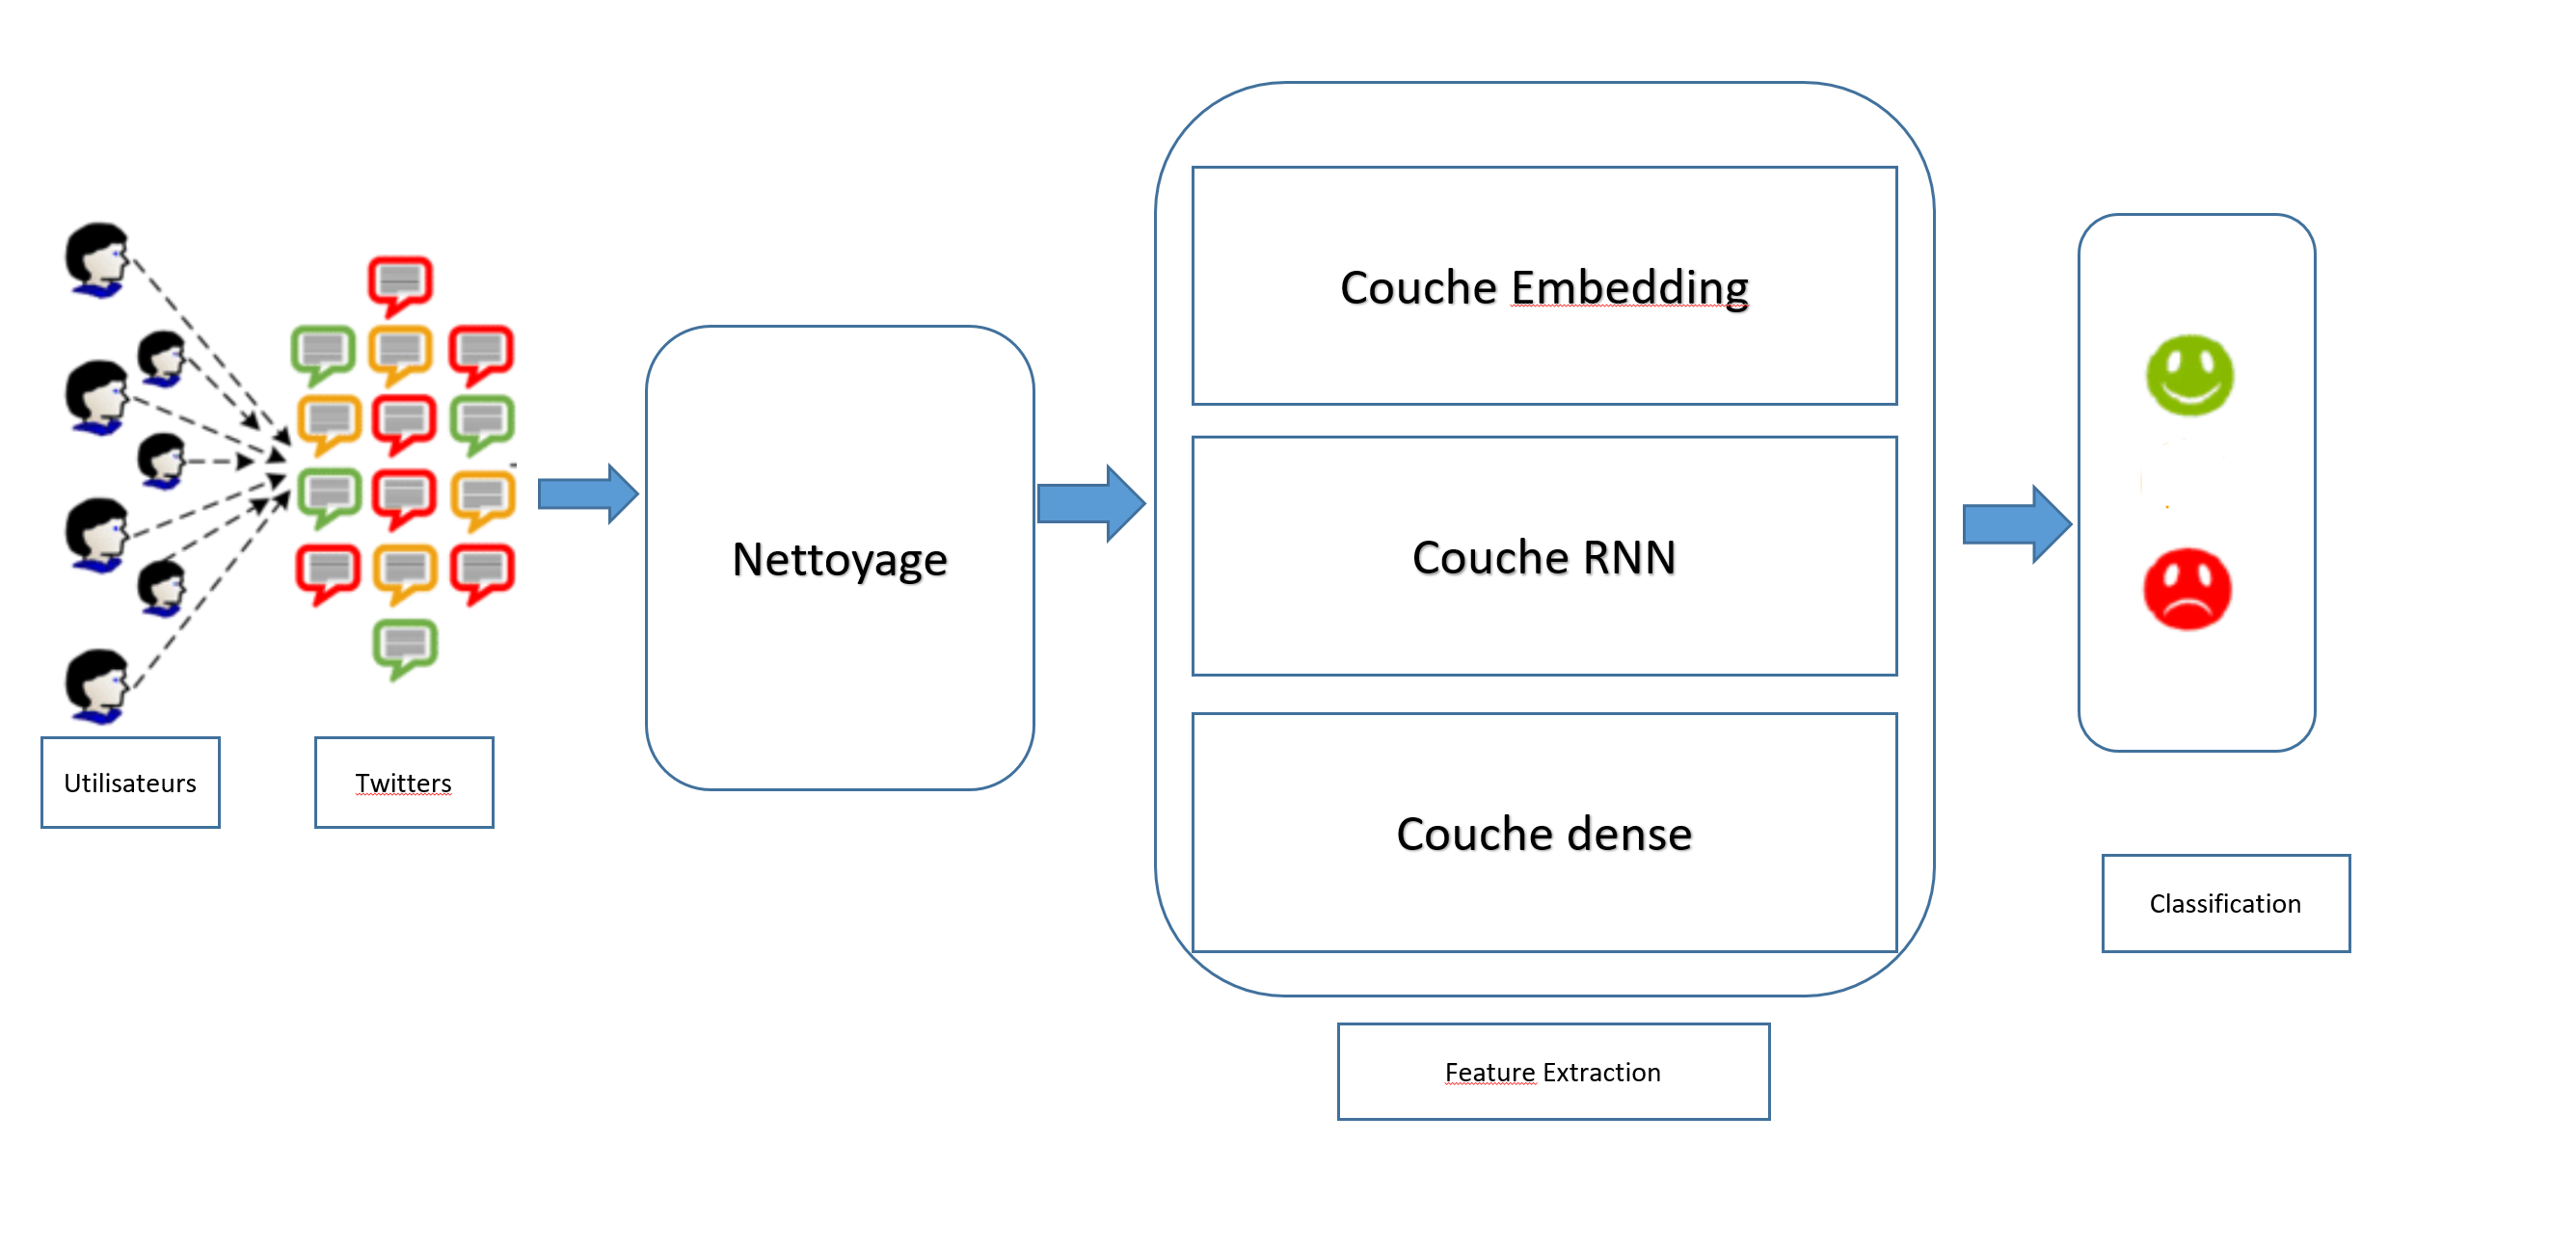

Trois couches sont à définir: une couche d'embedding, une couche de RNN et une couche dense.
Expliquez le fonctionnement de chaque couche.

<em>À COMPLÉTER</em>


In [48]:
# Couche Embedding
embedding = tf.keras.layers.Embedding(
    len(tokenizer.word_index)+1,
    100, 
    embeddings_initializer = tf.keras.initializers.Constant(embedding_matrix),
    trainable=False # cette couche embedding est fixée, il ne faut pas
                    # qu'elle soit rentrée dans la couche d'entrainement
)

### RNN: Réseaux de neurones réccurents simples 

Les réseaux de neurones récurrents simples ne sont pas adaptés aux données de langages naturels, ils sont plus utilisés pour les données séquentielles. 
Pour la couche RNN, les RNN simples ne donnent pas une bonne performance; en effet, l'un de leurs principaux problèmes est la disparition des gradients ou en anglais _Vanishing gradient_. Les RNNs peuvent être assez longs, et peuvent avoir du mal à rétropropager les gradients jusqu'à la première couche du réseau. Lorsque cela se produit, le réseau ne peut pas apprendre les relations entre des tokens éloignés. 

À votre avis, quelle est la conséquence du Vanishing problem ?

<em>À COMPLÉTER</em>


Si vous en avez envie, vous pouvez essayer le fonctionnement de RNN simples et voir ce que ça peut donner dans notre cas. Ne le faites pas pendant le Workshop, vous perdrez du temps d'apprentissage pour rien.


Comment éviter ce problème ?

<em>À COMPLÉTER</em>
 
Parmi les trois architectures de RNN, quelles sont celles qui permettent de le faire ?

<em>À COMPLÉTER</em>

Nous allons appliquer et comparer ces types de réseaux de neurones récurrents.

### GRU: Gated Recurrent Units

Nous allons tout d'abord essayer de comprendre l'architecture du réseaux de neurones de type GRU ( Gated Recurrent Unit). 
Ces réseaux de neurones sont formés de deux portes :

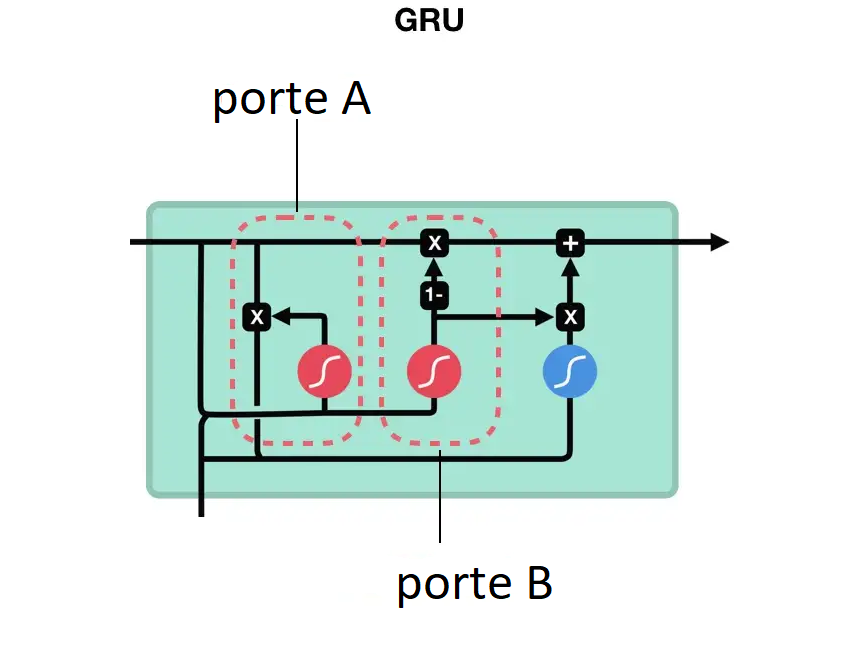

Chaque "porte" correspond à un petit réseau neuronal avec sigmoïde comme fonction d'activation dont le but est de ramener les valeurs des vecteurs en entrée de la porte entre 0 et 1.

Comment s'appellent ces deux portes (gates en anglais) nommées A et B dans la figure ? Quelle est le fonctionnement de chacune ?

<em>À COMPLÉTER</em>

Vous trouverez une description plus détaillée du GRU dans [Illustrated Guide to LSTM’s and GRU’s: A step by step explanation](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21). 

Créons donc le modèle 1 avec le type GRU, constitué d'une couche cachée, de 128 neurones, et un droupout de 0.2 :


In [50]:
# Création de l'architecture du modèle 1
model1 = tf.keras.Sequential([
    embedding,
   tf.keras.layers.SpatialDropout1D(0.2),
    # GRU avec 128 neurones et un dropout=0.2
    #À COMPLÉTER
    ,tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()

Puis nous compilons le modèle en définissant la fonction d'apprentissage (avec un Adam de 0.01) et la fonction de perte (ici, loss binary crossentropy). Nous avons également ajouté un paramètre de métrique pour que la précision du modèle soit imprimée par époque.

In [51]:
model1.compile(
    loss= #À COMPLÉTER
    , optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy']
)

Finalement, nous commençons l'entraînement du modèle sur la partie train, avec 50 époques :

In [52]:
history1 = model1.fit(
    tf_data, 
    validation_data = tf_val_data,
    epochs = 50
  )


Nous allons visualiser les deux métriques: l'erreur et la précision, par époque, lors de l'entraînement du modèle pour avoir une meilleure idée de la façon dont l'entraînement s'est déroulé. 

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].set_title('Loss')
axs[0].plot(history1.history['loss'], label='train')
axs[0].plot(history1.history['val_loss'], label='val')
axs[0].legend()

axs[1].set_title('Accuracy')
axs[1].plot(history1.history['accuracy'], label='train')
axs[1].plot(history1.history['val_accuracy'], label='val')
axs[1].legend()



### LSTM 

Nous allons tester un autre modèle en utilisant le type de Réseaux de neurones LSTM. L'usage de LSTM est très efficace pour exécuter des taches de NLP.

Un réseau LSTM est organisé de manière similaire à un RNN, mais deux états sont transmis d'une couche à l'autre : l'état réel et le vecteur caché. À chaque unité, le vecteur caché est combiné à l'entrée , et ensemble, ils contrôlent ce qui arrive à l'état et à la sortie par le biais de portes. Chaque porte a une activation sigmoïde (sortie dans la plage), qui peut être considérée comme un masque bit à bit lorsqu'elle est multipliée par le vecteur d'état. Les LSTMs ont alors les trois portes.

Notons que La ligne horizontale dans le schéma suivant correspond à la propagation quasi à l'identique du vecteur d'état de cellule (_cell state_), ce qui assure la propagation de l'information initiale.

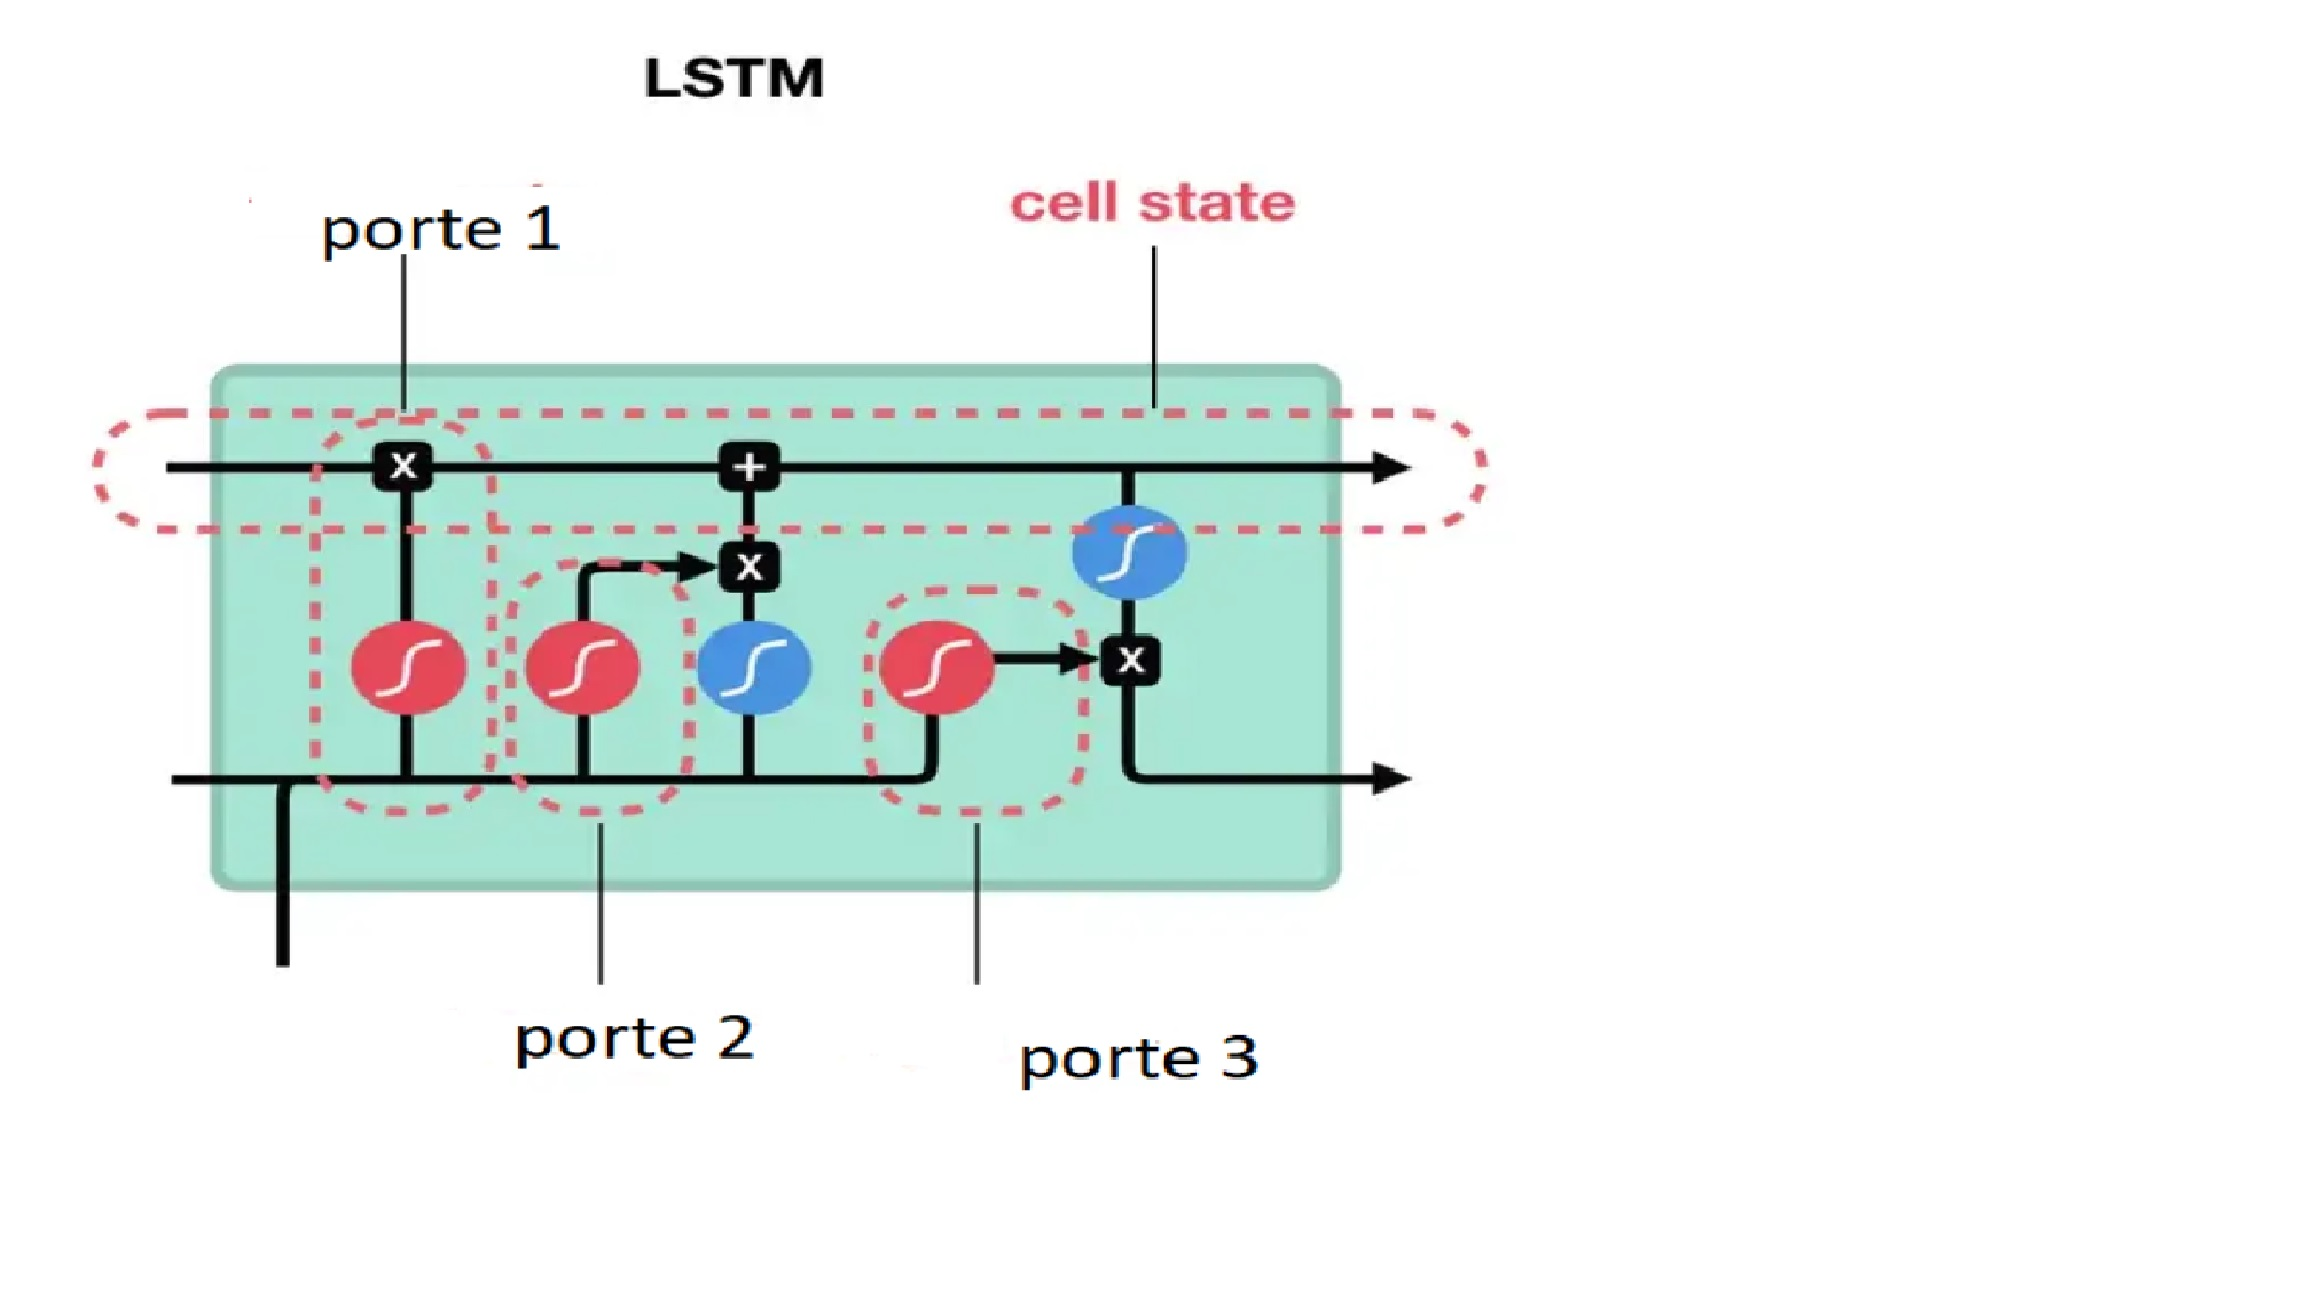

Quel est le nom et le fonctionnement de ces différents portes  ?

<em>À COMPLÉTER</em>

Vous trouverez des explications plus détaillées de cette architecture [ici](https://larevueia.fr/quest-ce-quun-reseau-lstm/).

Pour les scénarios qui nécessitent un accès aléatoire à la séquence d'entrée, il est plus logique d'exécuter le calcul récurrent dans les deux sens. Les RNN qui permettent des calculs dans les deux sens sont appelés RNN <em>bidirectionnels</em>, et ils peuvent être créés en enveloppant la couche récurrente d'une couche bidirectonale spéciale.

La couche bidirectionnelle fait deux copies de la couche qu'il contient, et définit la propriété `go_backwards` de l'une de ces copies à <code class="cm-s-ipython language-python"><span class="cm-keyword">True</span></code>, la faisant aller dans la direction opposée le long de la séquence. 
Les réseaux récurrents, unidirectionnels ou bidirectionnels, capturent des patterns dans une séquence, et les stockent dans des vecteurs d'état ou les renvoient en sortie. Comme pour les réseaux convolutifs, nous pouvons construire une autre couche récurrente à la suite de la première pour capturer des patterns de plus haut niveau, construits à partir de patterns de plus bas niveau extraits par la première couche. Cela nous conduit à la notion de RNN multicouche, qui consiste en deux réseaux récurrents ou plus, où la sortie de la couche précédente est transmise à la couche suivante comme entrée.
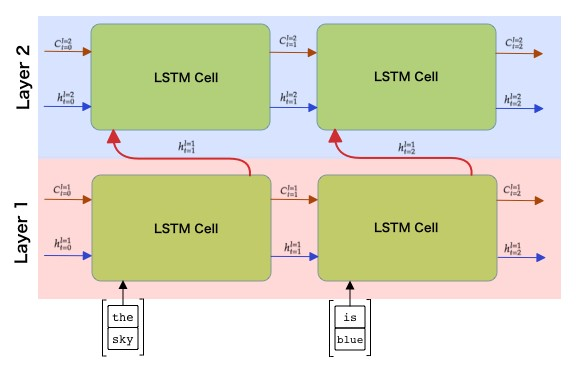
                                Figure faite par Fernando López.

Construisons un LSTM bidirectionnel à une couche cachée avec 128 neurones et dropout égal à 0.3.

In [54]:
model2 = tf.keras.Sequential([
    embedding,
    tf.keras.layers.SpatialDropout1D(0.4),
    # LSTM bidirectionnel à une couche cachée avec 128 neurones et dropout égal à 0.3
    #À COMPLÉTER
    , tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    # fonction de loss binary cross entropy
    loss= #À COMPLÉTER
    , optimizer=tf.keras.optimizers.Adam(0.01), 
    # accuracy metric
    #À COMPLÉTER

history2 = model2.fit( tf_data,  validation_data = tf_val_data, epochs = 50   ) 

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].set_title('Loss')
axs[0].plot(history2.history['loss'], label='train')
axs[0].plot(history2.history['val_loss'], label='val')
axs[0].legend()

axs[1].set_title('Accuracy')
# Représentation de l'accuracy pour data train en axe 2
#À COMPLÉTER
# Représentation de l'accuracy pour data val en axe 2
#À COMPLÉTER
axs[1].legend()



Comparez les résultats trouvés par LSTM à ceux de GRU. Que peut-on en conclure ?

<em>À COMPLÉTER</em>


## Évaluation des performances des modèles 

On sait maintenant quelle architecture est la plus adaptée, mais il est intéressant de comprendre pourquoi. Voyons quelles sont les phrases que nos deux modèles ont mal interprété. Pour ce faire, les modèles doivent produire des prédictions pour l'ensemble de données. Cela implique un pipeline légèrement différent.

In [55]:
prediction1 = model1.predict(tf_val_data)
prediction1 = np.concatenate(prediction1).round().astype(int)
dtest['prediction1'] = prediction1

prediction2 = model2.predict(tf_val_data)
prediction2 = np.concatenate(prediction2).round().astype(int)
dtest['prediction2'] = prediction2

### Evaluation des modèles par le dataset test 

Jetons un coup d'œil aux résultats du modèle 1 et du modèle 2 pour nous faire une idée de leurs performances. La méthode d'évaluation la plus rapide et la plus simple consiste à examiner les métriques produites par le modèle. Les métriques finales peuvent être extraites à l'aide de la méthode `evaluate` sur le jeu de données de validation.

In [56]:
# Evaluation du modèle  GRU sur la partie test
score1=model1.evaluate(dtest['prediction1'],dtest['target'],verbose=1)

print("Validation Score model1:", score1[0])
print("Validation Accuracy model1:", score1[1]) 

Affichez l'évaluation du modèle LSTM sur la partie de test. Il nous faut la valeur de l'erreur de la validation ainsi que l'accuracy ou la précision.

In [57]:
# Evaluation du modèle LSTM sur la partie test
score2 = #À COMPLÉTER

# Affichage de l'erreur: Validation Score model1 et de l'accuracy du modèle 2: Validation Accuracy model2
print( #À COMPLÉTER
print( #À COMPLÉTER


Que pensez-vous de ces valeurs ? Qu'en concluez-vous ?
 
<em>À COMPLÉTER</em>


Essayons maintenant de rentrer un peu plus dans le détail des performances de cette architecture.

### Évaluation des résultats du LSTM
Commençons par examiner les faux positifs. À quelle situation ces faux positifs correspondent-ils ?

<em>À COMPLÉTER</em>
Comptons donc ces faux positifs, et jetons un coup d'oeil aux 10 premiers tweets.

In [59]:
false_positives = #À COMPLÉTER

print('Count of false positives: ' + str(len(false_positives)))

false_positives.head(10)

Ensuite, il faut faire la même chose avec les faux négatifs. À quel comportement du réseau correspondent-ils ?

<em>À COMPLÉTER</em>


In [60]:
false_negatives = #À COMPLÉTER

print('Count of false negatives: ' + str(len(false_negatives)))

false_positives.tail(10)

Une fois que le modèle est entraîné, il ne reste plus que quelques étapes à franchir pour charger les données de test et utiliser le modèle pour étiqueter les phrases de test comme désastre ou non. Tout d'abord, convertissez les données en un ensemble de données TensorFlow et appliquez les méthodes du pipeline. Le pipeline a été légèrement ajusté pour tenir compte du fait que l'on ne veut pas de shuffling et de la forme différente de l'entrée (sans étiquette).

In [61]:
tf_test_data = tf.data.Dataset.from_tensor_slices((encoded_test_sentences))


def test_pipeline(tf_data, batch_size=1):        
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    tf_data = tf_data.padded_batch(batch_size, padded_shapes=([None]))
    
    return tf_data

tf_test_data = test_pipeline(tf_test_data)

print(len(tf_test_data))

# Utiliser le modèle pour étiqueter les phrases des données test comme désastre ou non
predictions = model2.predict(tf_test_data)

predictions = np.concatenate(predictions).round().astype(int)

Soumettez les phrases des données du dataset test et sauvegardez la soumission dans un fichier CSV pour pouvoir classer chaque tweet avec une catastrophe évoquée ou non.


In [62]:

submission = #À COMPLÉTER
submission.index = #À COMPLÉTER
submission.to_csv('submission.csv')


submission.head()

Suite à cette étude nous avons pu prévoir l'analyse des sentiments des tweets par RNN. 


### Pour aller plus loin avec NLP

Les ensembles de données d'apprentissage, de validation et de test sont susceptibles de contenir des mots que les autres ensembles de données ne contiennent pas. Si le modèle n'est entraîné que sur les mots de l'ensemble de données d'entraînement, il peut y avoir un problème d'overfitting lorsque le modèle essaie de lire des mots qu'il ne reconnaît pas dans les ensembles de données de validation et de test.

La question qui se pose, c'est _à quel point ce problème est-il présent ?_
La fonction ci-dessous prend deux ensembles de données et compte la façon dont les mots correspondent et ne correspondent pas, elle nous permettra de nous faire une idée.

In [63]:
def compare_words(train_words, test_words):
    unique_words = len(np.union1d(train_words, test_words)) 
    matching = #À COMPLÉTER
    not_in_train = len(np.setdiff1d(test_words, train_words)) 
    not_in_test = len(np.setdiff1d(train_words, test_words))
    
    print('Nombre de mots dans les deux parties dtrain et dtest: ' + str(unique_words))
    print('Nombre de mots en concordance: ' + str(matching))
    print('Nombre de mots dans le dataset dtrain et non dans le dataset test: ' + str(not_in_test))
    print('Nombre de mots dans le dataset test et non pas dans le dataset dtrain: ' + str(not_in_train))

# Comparaison entre les données d'apprentissage et les données validation
compare_words(encoded_sentences, val_encoded_sentences)

Cela montre que seulement 25 % des mots se trouvent dans les deux ensembles de données et que l'ensemble de données utilisé pour la validation contient 16 % des mots qui ne se trouvent pas dans l'ensemble de données utilisé pour l'entraînement. Manifestement, cela affecte négativement les performances du modèle.

In [64]:
# Comparaison entre les données d'apprentissage et les données test
compare_words(encoded_sentences, encoded_test_sentences)

28 % se trouvent dans les deux datasets.
47% se trouvent dans le dataset d'entraînement et pas dans le dataset de test
25 % se trouvent dans le dataset de test et pas dans le dataset d'entraînement.

Nous pouvons utiliser l'approche basée sur les règles lexiques (https://datapeaker.com/fr/Big-Data/analyse-des-sentiments-bas%C3%A9e-sur-des-r%C3%A8gles-en-python-pour-les-scientifiques-des-donn%C3%A9es/). Ces simples approches largement utilisées en NLP sont TextBlob, VADER, SentiWordNet. Elles recherchent les mots d'opinion dans un texte et les classer ensuite en fonction du nombre de mots annonçant une catastophe ou non.

# Conclusion

Bravo, Vous venez de réaliser votre premier travail d'analyse du traitement de langage naturel ou NLP ! Vous avez effectuer une analyse des Tweets en utilisant les réseaux de neurones récurrents GRU et LSTM. 

Vous avez vu comment nettoyer les corpus, visualiser les résultats des Twitters puis vous avez pu implémenter, entraîner et évaluer les RNN ainsi qu'améliorer ses performances en essayant GRU et LSTM. Félicitations !

Mais il vous reste à améliorer la performance du modèle. Tout d'abord, la précision n'est que de 79.3% . Évidemment, augmenter la taille du réseau va nettement impacter la rapidité de l'apprentissage. Il existe sûrement d'autres approches pour améliorer les résultats. Ici dans l'étape de Word embedding, nous avons utilisé GloVe, un algorithme d'apprentissage non supervisé qui fait correspondre les mots dans un espace où la similarité sémantique entre les mots est observée par la distance entre les mots. D'autres techniques de word embedding telles que Word2vec ou Se2seq, peuvent être utilisées. Il existe également des architectures prétraitées, appelées Transformer, que vous pouvez utiliser, telles que BERT(Devlin et al., 2018), et GPT-2 (de Radford et al 2019). Pour approfondir vos connaissances sur ces approches, vous pouvez consulter le site ce [lien](https://france.devoteam.com/paroles-dexperts/lstm-transformers-gpt-bert-guide-des-principales-techniques-en-nlp/).
